# Optimization Formulations
linprog() solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization.

[Source: https://realpython.com/linear-programming-python/]

In [1]:
# Import the libraries
from scipy.optimize import linprog

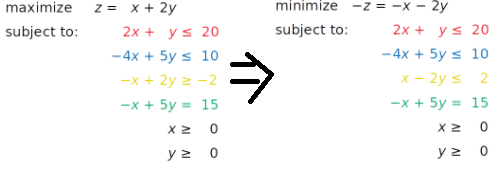

In [2]:
# Edit all the parameters
obj = [-1, -2]
#      ─┬  ─┬
#       │   └┤ Coefficient for y
#       └────┤ Coefficient for x

lhs_ineq = [[ 2,  1],  # Red constraint left side
            [-4,  5],  # Blue constraint left side
            [ 1, -2]]  # Yellow constraint left side

rhs_ineq = [20,  # Red constraint right side
            10,  # Blue constraint right side
             2]  # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

bnd = [(0, float("inf")),  # Bounds of x (Greater than and Equal to zero)
       (0, float("inf"))]  # Bounds of y

In [3]:
# Call the optimizer
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
               A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
               method="revised simplex")
# Different methods: simplex’. ‘highs’, ‘highs-ds’, ‘highs-ipm’, ‘interior-point’ (default), and ‘revised simplex’

opt

     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])

In [4]:
# The meaning behind these variables:

# linprog() returns a data structure with these attributes:
#    .con is the equality constraints residuals.
#    .fun is the objective function value at the optimum (if found).
#    .message is the status of the solution.
#    .nit is the number of iterations needed to finish the calculation.
#    .slack is the values of the slack variables, or the differences between the values of the left and right sides of the constraints.
#    .status is an integer between 0 and 4 that shows the status of the solution, such as 0 for when the optimal solution has been found.
#    .success is a Boolean that shows whether the optimal solution has been found.
#    .x is a NumPy array holding the optimal values of the decision variables.


In [4]:
# You can get each value independently:
opt.fun

-16.818181818181817

In [5]:
opt.success

True

In [6]:
opt.x

array([7.72727273, 4.54545455])